<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/Data_Mining_Project_Predicting_Missing_Values_using_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**กลุ่ม น้องก้อง(กิตติภัค)และผองเพื่อน**


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1) Importing Dataset**

In [103]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [104]:
df = pd.read_csv('/content/insurance.csv')

In [105]:
# Showing first five rows of the data frame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


In [106]:
# Showing the numbers of rows (data points) and columns (features)
df.shape

(1338, 7)

In [107]:
# Showing the Statistical measures of the data
df.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [108]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338
unique,NaN,2,NaN,NaN,2,4,1279
top,NaN,male,NaN,NaN,no,southeast,?
freq,NaN,676,NaN,NaN,1064,364,59
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN


In [109]:
"""
age = อายุ
sex = เพศ
bmi = ค่า bmi (body mass index)
children = จำนวนบุตรที่มี
smoker = ดูดบุหรี่ไหม
region = อาศัยอยู่แถวภาคไหน
charges = ค่าใช้จ่าย
"""

'\nage = อายุ\nsex = เพศ\nbmi = ค่า bmi (body mass index)\nchildren = จำนวนบุตรที่มี\nsmoker = ดูดบุหรี่ไหม\nregion = อาศัยอยู่แถวภาคไหน\ncharges = ค่าใช้จ่าย\n'

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [111]:
for i in df.columns:
  print(df[i].value_counts())
  print()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

male      676
female    662
Name: sex, dtype: int64

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

?             59
1639.5631      2
16884.924      1
7243.8136      1
1634.5734      1
 

## **2) Data Visualization**

Categorical Features:
- Sex
- Smoker
- Region

Numerical Feature:
- age
- bmi
- children
- charges

**- Sex**

In [112]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

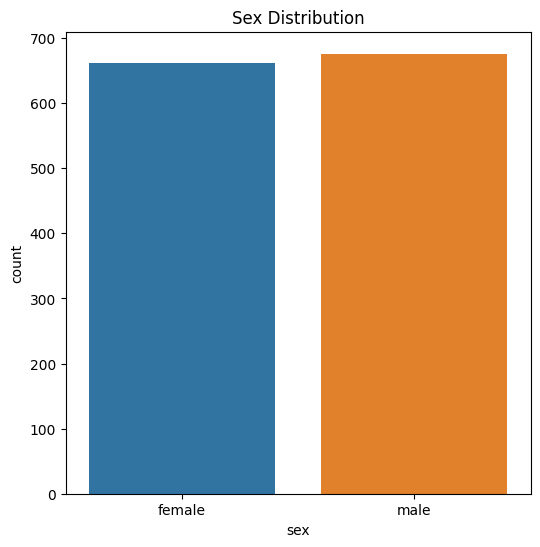

In [113]:
# Sex column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

**- Smoker**

In [114]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

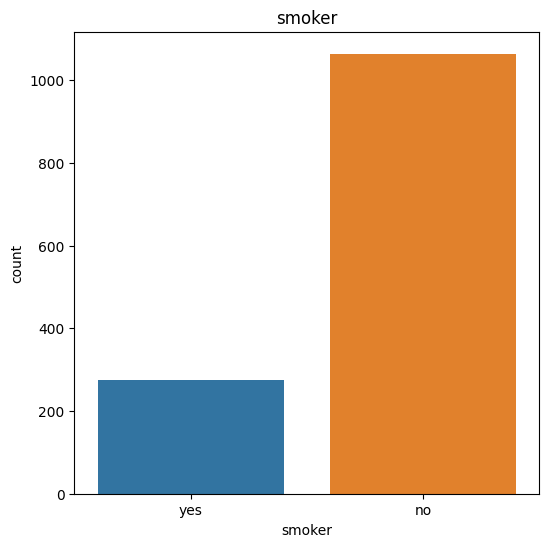

In [115]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

**- region**

In [116]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

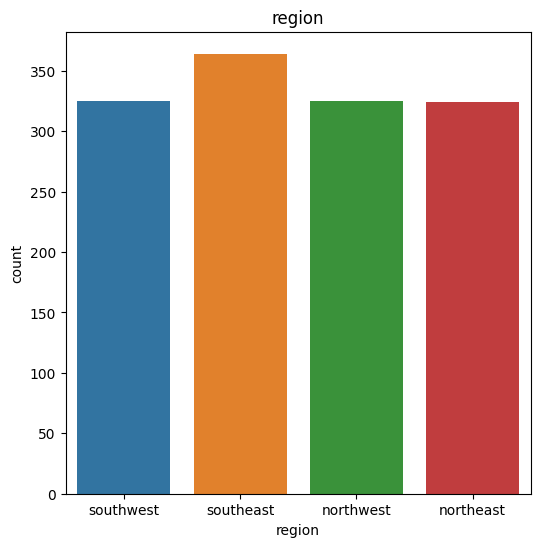

In [117]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

**- Children**

In [118]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

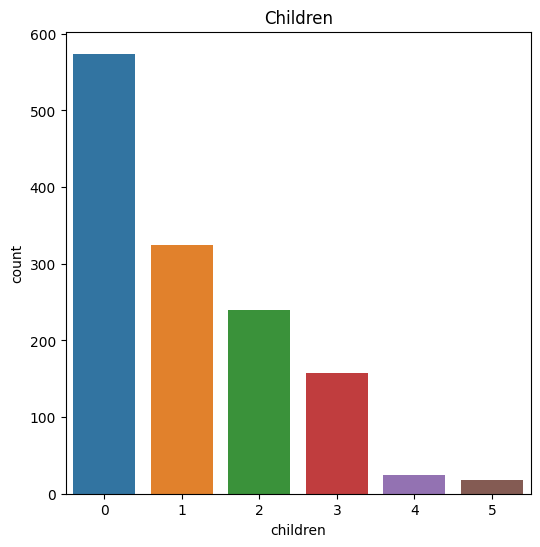

In [119]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

**- Age**

<ipython-input-120-8f7e8d1092d2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


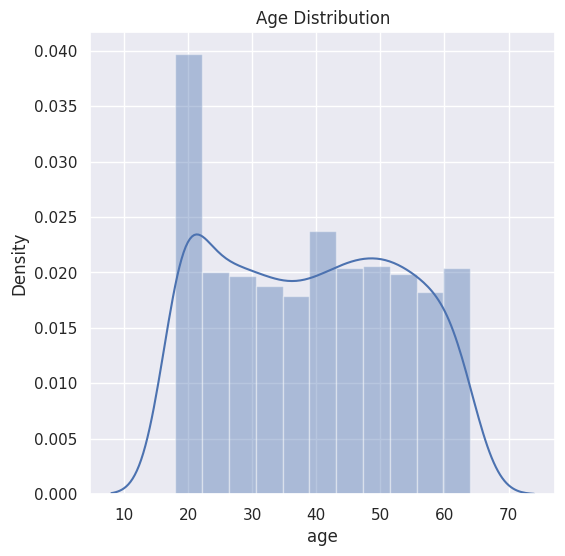

In [120]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

**bmi**

<ipython-input-121-fa5a17d58dfb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


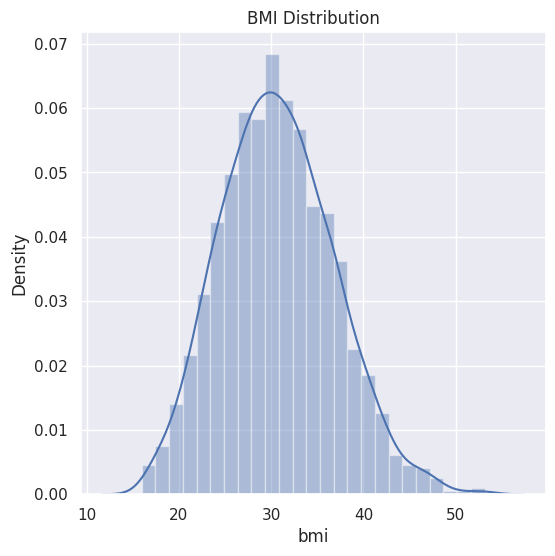

In [121]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

## **3) Processing Missing Values by Predicting Missing Values using ML Algorithms**

In [122]:
df_process = df.copy()

In [123]:
df_process.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
5,31,female,25.740,0,no,southeast,3756.6216
6,46,female,33.440,1,no,southeast,8240.5896
7,37,female,27.740,3,no,northwest,?
8,37,male,29.830,2,no,northeast,6406.4107
9,60,female,25.840,0,no,northwest,28923.13692


### **3.1.1) Encoding - Transforming Categorical Data to Numerical Data**

In [124]:
# Transforming Categorical Data to Numerical Data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in ["sex", "smoker", "region"]:
  df_process[feature] = encoder.fit_transform(df_process[feature])

In [125]:
df_process.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.5523
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.8552


In [126]:
(df_process == '?').sum(axis=0) #axis = 0 for column

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges     59
dtype: int64

In [127]:
# Replace ค่า "?" ด้วย NaN
df_process.replace('?', np.NaN, inplace=True)

In [128]:
(df_process == '?').sum(axis=0) #axis = 0 for column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **3.1.2) Train/Test splitting**

- Separate the null values from the data frame (df) and create a variable “for_prediction_data”

In [129]:
for_prediction_data = df_process[df_process["charges"].isnull()]

In [130]:
for_prediction_data

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,NaN
25,59,0,27.720,3,0,2,NaN
57,18,1,31.680,2,1,2,NaN
80,31,1,26.885,1,0,0,NaN
116,58,1,49.060,0,0,2,NaN
154,40,0,25.460,1,0,0,NaN
178,46,0,28.900,2,0,3,NaN
194,18,1,34.430,0,0,2,NaN
242,55,0,26.800,1,0,3,NaN
243,40,1,35.300,3,0,3,NaN


- Drop the null values from the data frame (df) and represent 80% of them as "train data” and 20% of them as "test data"

In [131]:
df_process.dropna(inplace = True)

In [132]:
df_process

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.5523
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.8552
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.685
1333,50,1,30.970,3,0,1,10600.5483
1334,18,0,31.920,0,0,0,2205.9808
1335,18,0,36.850,0,0,2,1629.8335


In [133]:
df_process.drop("charges", axis=1).shape

(1279, 6)

In [134]:
X = df_process.drop("charges", axis=1).values
Y = df_process["charges"].values

In [135]:
print(X)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   31.92  0.    0.    0.  ]
 [18.    0.   36.85  0.    0.    2.  ]
 [61.    0.   29.07  0.    1.    1.  ]]


In [136]:
X.shape

(1279, 6)

In [137]:
print(Y)

['16884.924' '1725.5523' '4449.462' ... '2205.9808' '1629.8335'
 '29141.3603']


In [138]:
Y = [eval(numeric_string) for numeric_string in Y]
print(Y)

[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 6406.4107, 28923.13692, 2721.3208, 27808.7251, 1826.843, 11090.7178, 39611.7577, 1837.237, 10797.3362, 2395.17155, 10602.385, 36837.467, 13228.84695, 4149.736, 1137.011, 37701.8768, 6203.90175, 14451.83515, 12268.63225, 2775.19215, 38711, 35585.576, 2198.18985, 4687.797, 13770.0979, 51194.55914, 1625.43375, 15612.19335, 2302.3, 39774.2763, 48173.361, 3046.062, 4949.7587, 6272.4772, 6313.759, 6079.6715, 20630.28351, 3393.35635, 3556.9223, 12629.8967, 38709.176, 2211.13075, 3579.8287, 23568.272, 37742.5757, 8059.6791, 47496.49445, 13607.36875, 23244.7902, 5989.52365, 8606.2174, 4504.6624, 30166.61817, 4133.64165, 14711.7438, 1743.214, 14235.072, 6389.37785, 5920.1041, 17663.1442, 16577.7795, 6799.458, 11741.726, 11946.6259, 7726.854, 11356.6609, 3947.4131, 1532.4697, 2755.02095, 6571.02435, 7935.29115, 37165.1638, 11033.6617, 39836.519, 21098.55405, 43578.9394, 11073.176, 8026.6666, 11082.5772, 2026.9741, 1094

Step 2.1.3)
Splitting the dataset into the Training set and Test set

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [140]:
print(X_train)

[[49.     0.    33.345  2.     0.     0.   ]
 [21.     1.    26.03   0.     0.     0.   ]
 [38.     1.    16.815  2.     0.     0.   ]
 ...
 [60.     1.    32.8    0.     1.     3.   ]
 [54.     1.    30.02   0.     0.     1.   ]
 [45.     1.    20.35   3.     0.     2.   ]]


In [141]:
print(X_test)

[[54.     0.    31.9    3.     0.     2.   ]
 [27.     1.    31.13   1.     1.     2.   ]
 [64.     1.    33.88   0.     1.     2.   ]
 ...
 [49.     1.    35.86   0.     0.     2.   ]
 [45.     0.    35.815  0.     0.     1.   ]
 [19.     0.    30.495  0.     0.     1.   ]]


In [142]:
print(Y_train)

[10370.91255, 2102.2647, 6640.54485, 6313.759, 30942.1918, 2250.8352, 44400.4064, 12096.6512, 11286.5387, 10355.641, 11073.176, 38245.59327, 6571.02435, 1615.7667, 12265.5069, 1621.3402, 25309.489, 1711.0268, 4234.927, 4347.02335, 10795.93733, 42760.5022, 14283.4594, 58571.07448, 4738.2682, 9957.7216, 13880.949, 6185.3208, 1646.4297, 36124.5737, 1634.5734, 26109.32905, 11657.7189, 40182.246, 10601.412, 1515.3449, 25081.76784, 5438.7491, 41097.16175, 11365.952, 14256.1928, 5002.7827, 1146.7966, 6746.7425, 2632.992, 7358.17565, 4747.0529, 15612.19335, 11082.5772, 8410.04685, 10450.552, 13555.0049, 47928.03, 2497.0383, 16085.1275, 1981.5819, 34672.1472, 8442.667, 36898.73308, 6311.952, 4753.6368, 10713.644, 28476.73499, 3994.1778, 1121.8739, 15828.82173, 62592.87309, 4462.7218, 36197.699, 6358.77645, 5031.26955, 4673.3922, 3044.2133, 18955.22017, 13462.52, 2166.732, 6748.5912, 2438.0552, 7046.7222, 27808.7251, 20878.78443, 10923.9332, 24393.6224, 8017.06115, 15555.18875, 2457.502, 2473.33

In [143]:
print(Y_test)

[27322.73386, 34806.4677, 46889.2612, 11520.09985, 36580.28216, 4133.64165, 8125.7845, 5488.262, 1880.487, 1253.936, 12648.7034, 13217.0945, 1880.07, 17043.3414, 7152.6714, 9304.7019, 9704.66805, 9283.562, 2755.02095, 9222.4026, 7160.3303, 9583.8933, 7147.4728, 15170.069, 12479.70895, 16657.71745, 12094.478, 5148.5526, 5116.5004, 21098.55405, 9282.4806, 5484.4673, 14478.33015, 13204.28565, 46151.1245, 12235.8392, 10594.50155, 12797.20962, 7731.4271, 8835.26495, 37133.8982, 19515.5416, 23401.30575, 19673.33573, 5469.0066, 3292.52985, 10043.249, 11534.87265, 27375.90478, 1261.442, 2709.1119, 7441.053, 2322.6218, 6610.1097, 5910.944, 5920.1041, 11093.6229, 9855.1314, 4686.3887, 2899.48935, 4827.90495, 24535.69855, 5267.81815, 9875.6804, 14449.8544, 6781.3542, 30184.9367, 12638.195, 11881.358, 9193.8385, 4243.59005, 39241.442, 5630.45785, 4646.759, 4435.0942, 6113.23105, 10965.446, 6555.07035, 1909.52745, 2156.7518, 7209.4918, 5397.6167, 6775.961, 7954.517, 7160.094, 39597.4072, 47269.854,

### **- Feature Scaling**

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [145]:
print(X_train)

[[ 0.71510443 -1.01675819  0.43127534  0.7420692  -0.52493914 -1.379453  ]
 [-1.2739664   0.98351802 -0.76403319 -0.90464835 -0.52493914 -1.379453  ]
 [-0.06631625  0.98351802 -2.26981147  0.7420692  -0.52493914 -1.379453  ]
 ...
 [ 1.49652512  0.98351802  0.34221954 -0.90464835  1.90498275  1.32914666]
 [ 1.07029565  0.98351802 -0.11204672 -0.90464835 -0.52493914 -0.47658645]
 [ 0.43095146  0.98351802 -1.69217433  1.56542797 -0.52493914  0.4262801 ]]


In [146]:
print(X_test)

[[ 1.07029565 -1.01675819  0.19515492  1.56542797 -0.52493914  0.4262801 ]
 [-0.84773693  0.98351802  0.06933297 -0.08128958  1.90498275  0.4262801 ]
 [ 1.78067809  0.98351802  0.51869708 -0.90464835  1.90498275  0.4262801 ]
 ...
 [ 0.71510443  0.98351802  0.84223924 -0.90464835 -0.52493914  0.4262801 ]
 [ 0.43095146 -1.01675819  0.83488601 -0.90464835 -0.52493914 -0.47658645]
 [-1.41604289 -1.01675819 -0.03442929 -0.90464835 -0.52493914 -0.47658645]]


## **3.1.3) Model Fitting and Evaluation**

**- Fitting the LinearRegression Model**

In [147]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [148]:
lr_model.fit(X_train, Y_train)

LinearRegression()

**- Linear Regression - Model Evaluation**


In [149]:
# Prediction on training data
training_data_prediction = lr_model.predict(X_train)

In [150]:
# Using R squared value for evaluation
from sklearn import metrics
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [151]:
print("R Squared Value = ", r2_train)

R Squared Value =  0.7505304668630712


In [152]:
# Prediction on test data
test_data_prediction = lr_model.predict(X_test)

In [153]:
# R Squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [154]:
print("R Squared Value = ", r2_test)

R Squared Value =  0.7609906141350713


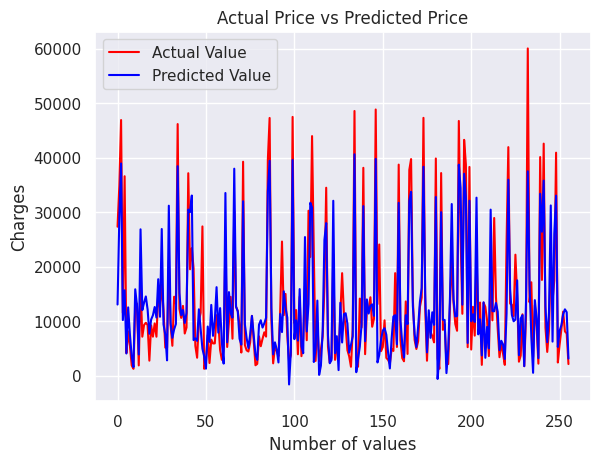

In [155]:
# Visualize the result of Linear Regression Model - Compare the Actual Values and Predicted Values in a Plot
Y_test_plot = list(Y_test)

plt.plot(Y_test_plot, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [156]:
#=================================================================================================================================================#

## **Extra: Try using other models**

Note:
- R-squared measures the goodness of fit of a regression model. Hence, a higher R-squared indicates the model is a good fit, while a lower R-squared indicates the model is not a good fit.
- The lower the MAE score the better. This is because MAE is a measure of the average error between the predictions and intended targets, thus we want to minimise this value.

In [157]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [158]:
# list of regressors
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    XGBRegressor()
]

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.004s
	Explained variance: 0.8231094760139249
	Mean absolute error: 3114.7212075296875
	R2 score: 0.8230703726868235


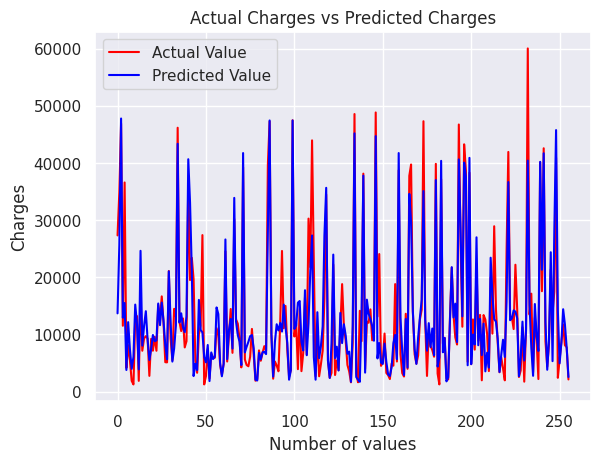


GradientBoostingRegressor()
	Training time: 0.128s
	Prediction time: 0.001s
	Explained variance: 0.8646057369054869
	Mean absolute error: 2635.8284063052492
	R2 score: 0.8640489432384791


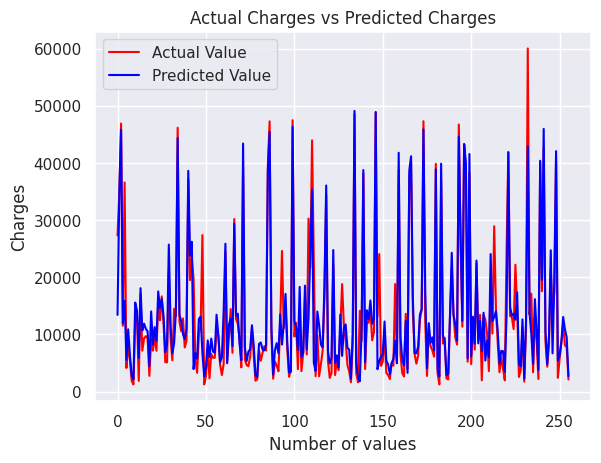


ExtraTreesRegressor()
	Training time: 0.273s
	Prediction time: 0.010s
	Explained variance: 0.7979140666753237
	Mean absolute error: 2980.015827507812
	R2 score: 0.7936053320005902


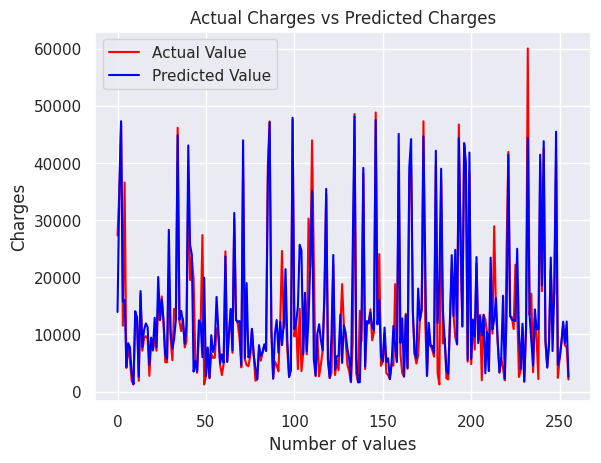


RandomForestRegressor()
	Training time: 0.336s
	Prediction time: 0.008s
	Explained variance: 0.8406098607810156
	Mean absolute error: 2833.6712286816864
	R2 score: 0.8375619364539679


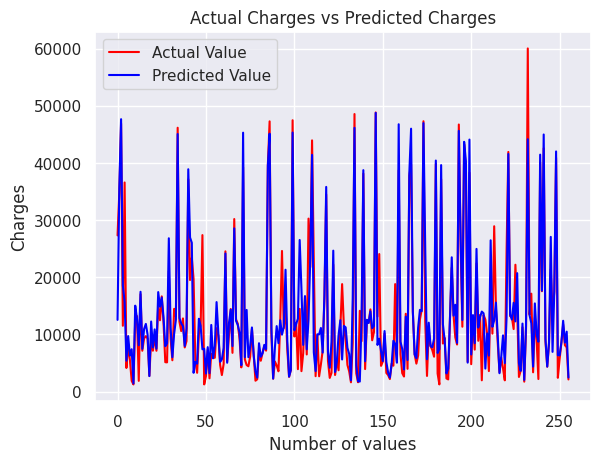


DecisionTreeRegressor()
	Training time: 0.006s
	Prediction time: 0.000s
	Explained variance: 0.6778464288534636
	Mean absolute error: 3264.1654295898434
	R2 score: 0.676157408305015


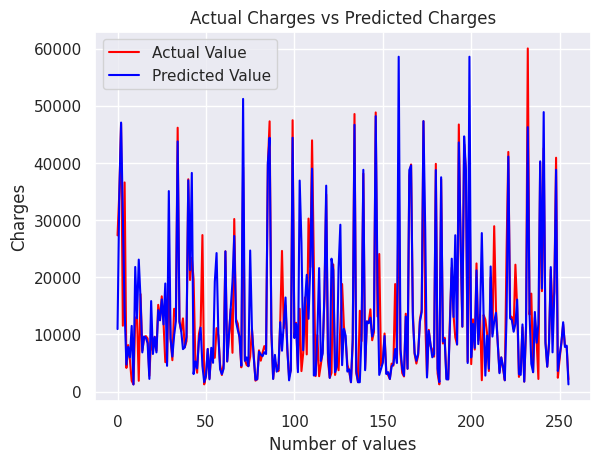


LinearRegression()
	Training time: 0.005s
	Prediction time: 0.000s
	Explained variance: 0.7613512342785913
	Mean absolute error: 4178.280868261418
	R2 score: 0.7609906141350713


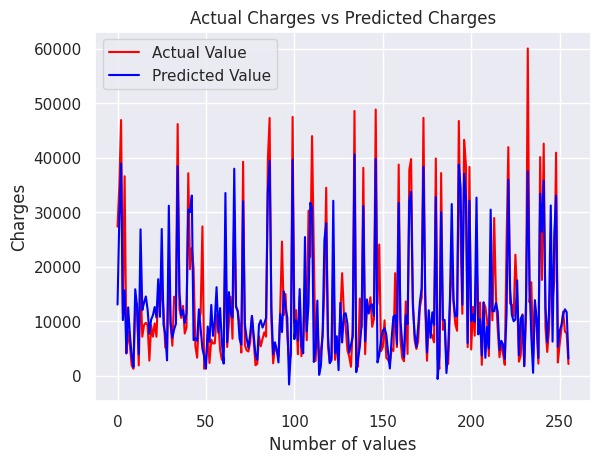


Lasso()
	Training time: 0.002s
	Prediction time: 0.000s
	Explained variance: 0.7613419068087037
	Mean absolute error: 4178.414085101126
	R2 score: 0.7609809346988364


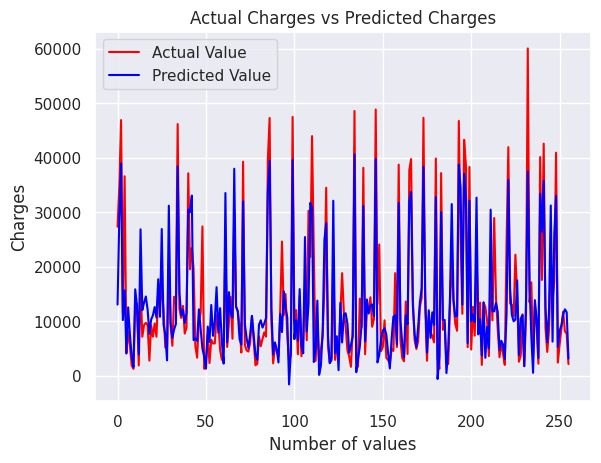


Ridge()
	Training time: 0.002s
	Prediction time: 0.000s
	Explained variance: 0.7613023606451041
	Mean absolute error: 4180.231624606131
	R2 score: 0.7609431669638305


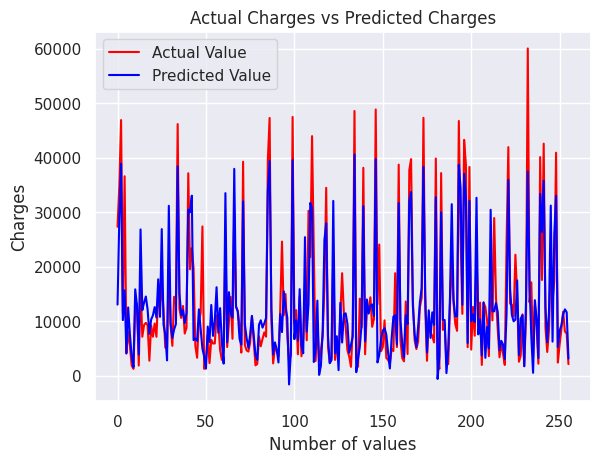


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
	Training time: 1.409s
	Prediction time: 0.002s
	Explained variance: 0.8125336138905513
	Mean absolute error: 3166.539609452515
	R2 score: 0.8103574872293571


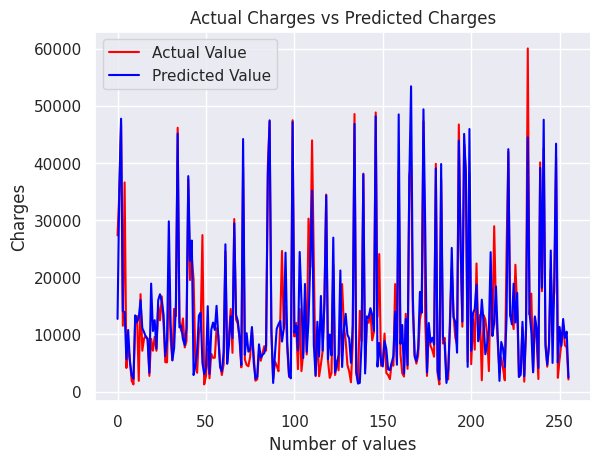

In [159]:
for model in regressors[:]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_test, y_pred))
    print("\tR2 score:", r2_score(Y_test, y_pred))

    # Visualize the result - Compare the Actual Values and Predicted Values in a Plot
    Y_test_plot = list(Y_test)
    plt.plot(Y_test_plot, color='red', label = 'Actual Value')
    plt.plot(y_pred, color='blue', label='Predicted Value')
    plt.title('Actual Charges vs Predicted Charges')
    plt.xlabel('Number of values')
    plt.ylabel('Charges')
    plt.legend()
    plt.show()
    print()

GradientBoostingRegressor() is the best as it has the highest R2 score => R2 score: 0.8640147320971926


**Try Linear Regression for predicting the missing values in the dataset**

In [187]:
# Linear Regression
model1 = LinearRegression()
model1.fit(X_train, Y_train)
for_prediction_data_by_linear = for_prediction_data.copy()
pred = for_prediction_data_by_linear.iloc[:, :-1] #select all rows and all columns except the last column (because last column is charges feature (target variable))

# Feature Scaling
pred = pred.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(pred)
pred = scaler.transform(pred)

# Predict
charges_pred = model1.predict(pred)

In [188]:
charges_pred

array([ 9513.52029402, 14755.10895263, 35290.40305195,  7232.54610366,
       20712.67058097,  9145.02806644, 11062.88395096,  5358.57288716,
       12270.81507292, 12021.90634675,  5157.25998284, 15406.90489829,
       10196.31555182, 11991.2945278 ,  8267.28593813, 14812.84925752,
        5268.96022148, 17344.18597893,  3716.8833047 , 31035.6440446 ,
       12327.44615962, 12335.67140463, 13404.76145041, 17725.02674894,
       13967.82104814,  6238.35274617, 15289.42563127, 42212.40525427,
       19116.6142345 , 10505.34298287, 11718.34048794, 10634.77226603,
        8657.44348588, 11217.91591684,  5556.23355956, 14954.6251612 ,
        2842.23629708,  5329.39809744,  3893.71879982,  9275.45178556,
        6926.65516193,  3229.37936244,  7594.32893651, 43891.80510172,
       11466.92347222,  7905.59943234, 19084.52702528, 13737.56214765,
        -190.30356414,  8977.85005496,  4087.94836938, 41512.20876419,
       38555.61985103, 14979.77809954,  8827.74897898,  7085.34216156,
      

In [189]:
for_prediction_data_by_linear["charges"] = charges_pred

In [190]:
for_prediction_data_by_linear

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,9513.520294
25,59,0,27.720,3,0,2,14755.108953
57,18,1,31.680,2,1,2,35290.403052
80,31,1,26.885,1,0,0,7232.546104
116,58,1,49.060,0,0,2,20712.670581
154,40,0,25.460,1,0,0,9145.028066
178,46,0,28.900,2,0,3,11062.883951
194,18,1,34.430,0,0,2,5358.572887
242,55,0,26.800,1,0,3,12270.815073
243,40,1,35.300,3,0,3,12021.906347


**Try GradientBoostingRegressor for predicting the missing values in the dataset**

In [191]:
# Gradient Boosting Regressor
model2 = GradientBoostingRegressor()
model2.fit(X_train, Y_train) #fitting the model
for_prediction_data_by_GradientBoosting = for_prediction_data.copy()
pred2 = for_prediction_data_by_GradientBoosting.iloc[:, :-1] #select all input variables (don't include the last column)

# Feature Scaling
pred2 = pred2.to_numpy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(pred2)
pred2 = scaler.transform(pred2)

charges_pred2 = model2.predict(pred2) #predict the missing values

In [192]:
charges_pred2

array([ 7689.02953536, 15800.96835507, 34831.39084755,  6858.95654498,
       12509.44682627,  7838.96027415,  8542.29096898,  2682.61047351,
       13018.52340812,  8016.60347549,  4036.04841819, 13504.37390246,
        8940.95036227, 10865.0141488 ,  5861.92159435, 12599.78516954,
        4420.90995748, 12689.10285982,  2675.81010979, 15413.52446364,
        9865.65542494,  8709.60530796, 11768.13910516,  9345.58935545,
       12025.18012217,  3843.04323151, 11764.91272072, 24922.54465249,
       12742.62969861,  7593.22490495, 12613.06813589,  7631.6228539 ,
        7550.1252528 , 13093.46651405,  2626.77111133, 12293.9542701 ,
        2518.25853265,  6276.68399709,  2778.0572801 ,  7058.70838393,
        7398.34241169,  3760.93564582,  6844.55843204, 43693.93276614,
        8408.61359576,  5236.14094652, 12978.62125595, 12620.08906549,
        1689.37441726, 11315.23167659,  3548.98395639, 24686.33319317,
       21697.18792783, 12392.99343451,  5277.60528334,  6793.37681395,
      

In [193]:
for_prediction_data_by_GradientBoosting["charges"] = charges_pred2

In [194]:
for_prediction_data_by_GradientBoosting

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,7689.029535
25,59,0,27.720,3,0,2,15800.968355
57,18,1,31.680,2,1,2,34831.390848
80,31,1,26.885,1,0,0,6858.956545
116,58,1,49.060,0,0,2,12509.446826
154,40,0,25.460,1,0,0,7838.960274
178,46,0,28.900,2,0,3,8542.290969
194,18,1,34.430,0,0,2,2682.610474
242,55,0,26.800,1,0,3,13018.523408
243,40,1,35.300,3,0,3,8016.603475


See the differences

In [195]:
tmp = for_prediction_data_by_linear["charges"] - for_prediction_data_by_GradientBoosting["charges"]

In [196]:
tmp.to_frame()
tmp

7        1824.490759
25      -1045.859402
57        459.012204
80        373.589559
116      8203.223755
154      1306.067792
178      2520.592982
194      2675.962414
242      -747.708335
243      4005.302871
274      1121.211565
283      1902.530996
285      1255.365190
299      1126.280379
303      2405.364344
317      2213.064088
324       848.050264
344      4655.083119
349      1041.073195
362     15622.119581
368      2461.790735
372      3626.066097
393      1636.622345
401      8379.437393
416      1942.640926
436      2395.309515
460      3524.512911
474     17289.860602
493      6373.984536
505      2912.118078
552      -894.727648
596      3003.149412
646      1107.318233
683     -1875.550597
723      2929.462448
765      2660.670891
791       323.977764
809      -947.285900
855      1115.661520
878      2216.743402
914      -471.687250
938      -531.556283
983       749.770504
1022      197.872336
1057     3058.309876
1083     2669.458486
1088     6105.905769
1098     1117

## **4) Replace the Missing Value in the dataset**

In [197]:
df_done = df.copy()
for_prediction_data_by_linear_done = for_prediction_data_by_linear.copy()

In [198]:
df_done.replace('?', np.NaN, inplace=True)

In [199]:
print(df_done.isnull().any())
print("\n")
print(df_done.isnull().sum())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges      True
dtype: bool


age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges     59
dtype: int64


In [200]:
df_done.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
5,31,female,25.740,0,no,southeast,3756.6216
6,46,female,33.440,1,no,southeast,8240.5896
7,37,female,27.740,3,no,northwest,NaN
8,37,male,29.830,2,no,northeast,6406.4107
9,60,female,25.840,0,no,northwest,28923.13692


In [201]:
for_prediction_data_by_linear_done.head(10)

,age,sex,bmi,children,smoker,region,charges
7,37,0,27.740,3,0,1,9513.520294
25,59,0,27.720,3,0,2,14755.108953
57,18,1,31.680,2,1,2,35290.403052
80,31,1,26.885,1,0,0,7232.546104
116,58,1,49.060,0,0,2,20712.670581
154,40,0,25.460,1,0,0,9145.028066
178,46,0,28.900,2,0,3,11062.883951
194,18,1,34.430,0,0,2,5358.572887
242,55,0,26.800,1,0,3,12270.815073
243,40,1,35.300,3,0,3,12021.906347


In [202]:
df_done.update(for_prediction_data_by_linear_done, overwrite=False)

In [203]:
df_done

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483
1334,18,female,31.920,0,no,northeast,2205.9808
1335,18,female,36.850,0,no,southeast,1629.8335
1336,21,female,25.800,0,no,southwest,2828.105332


In [204]:
(df_done == '?').sum(axis=0) #axis = 0 for column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [205]:
print(df_done.isnull().any())
print("\n")
print(df_done.isnull().sum())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [206]:
df_done.iloc[[7,25,57,80,116,154,178,194,242,243]]

,age,sex,bmi,children,smoker,region,charges
7,37,female,27.740,3,no,northwest,9513.520294
25,59,female,27.720,3,no,southeast,14755.108953
57,18,male,31.680,2,yes,southeast,35290.403052
80,31,male,26.885,1,no,northeast,7232.546104
116,58,male,49.060,0,no,southeast,20712.670581
154,40,female,25.460,1,no,northeast,9145.028066
178,46,female,28.900,2,no,southwest,11062.883951
194,18,male,34.430,0,no,southeast,5358.572887
242,55,female,26.800,1,no,southwest,12270.815073
243,40,male,35.300,3,no,southwest,12021.906347


In [207]:
df_done.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338
unique,NaN,2,NaN,NaN,2,4,1337
top,NaN,male,NaN,NaN,no,southeast,1639.5631
freq,NaN,676,NaN,NaN,1064,364,2
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN


In [208]:
df_done['charges'].dtype

dtype('O')

In [209]:
df_done.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges      object
dtype: object

In [210]:
df_done['charges'] = pd.to_numeric(df_done['charges'])
print(df_done.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [211]:
df_done.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13403.815267
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12134.459956
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,-190.303564
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4832.368075
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9508.915297
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16857.769013


In [212]:
df_done.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13403.815267
std,14.049960,6.098187,1.205493,12134.459956
min,18.000000,15.960000,0.000000,-190.303564
25%,27.000000,26.296250,0.000000,4832.368075
50%,39.000000,30.400000,1.000000,9508.915297
75%,51.000000,34.693750,2.000000,16857.769013
max,64.000000,53.130000,5.000000,63770.428010


In [186]:
# The End!